In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('TCGA_InfoWithGrade.csv', encoding = 'gb18030')
df

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


C:\Users\肖森\AppData\Local\Temp\ipykernel_8672\885849669.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age_at_diagnosis'], shade=True, color="b")


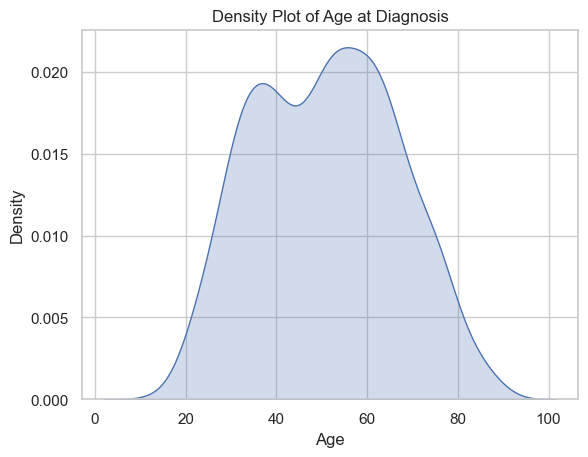

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置Seaborn风格
sns.set(style="whitegrid")

# 绘制密度图
sns.kdeplot(df['Age_at_diagnosis'], shade=True, color="b")
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age at Diagnosis')
plt.show()

In [3]:
# 导入 pandas 库
import pandas as pd

# 假设 df 是你的 DataFrame

# 将第一列保存为一个 Series
first_column = df.iloc[:, 0]

# 将第一列删除
df = df.drop(df.columns[0], axis=1)

# 将 Series 添加到 DataFrame 的最后一列
df['label'] = first_column

# 显示修改后的 DataFrame
df

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,label
0,0,51.30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.72,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.17,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,31.51,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,77.89,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
835,0,85.18,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
836,1,77.49,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
837,0,63.33,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


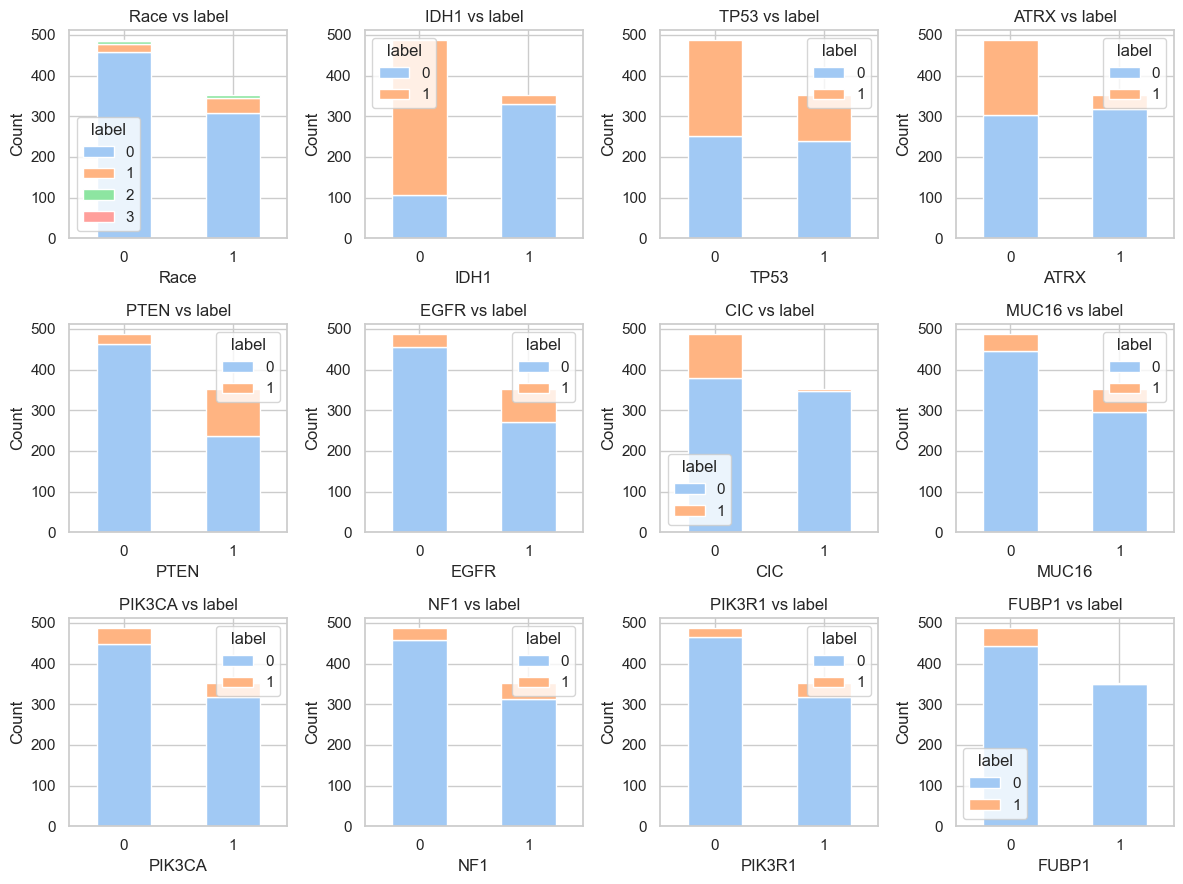

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 确定子图的排列方式
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
axes = axes.flatten()

# 循环遍历第二列到后面六列的列名
for i, col in enumerate(df.columns[2:14]): # 从第二列到后面六列
    # 获取当前子图
    ax = axes[i]

    # 按"label"的两种类别进行分组统计
    grouped_df = df.groupby(['label', col]).size().unstack()

    # 设置整体颜色主题为浅色
    sns.set_palette("pastel")

    # 绘制条形图
    grouped_df.plot(kind='bar', stacked=True, ax=ax)

    # 设置子图标题和x/y轴标签等
    ax.set_title(f'{col} vs label')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='label')

    # 将x轴上的数字标签旋转为竖向显示
    ax.tick_params(axis='x', rotation=0)  # 设置标签竖向显示

# 调整子图之间的间距和布局
plt.tight_layout()

# 显示图形
plt.show()


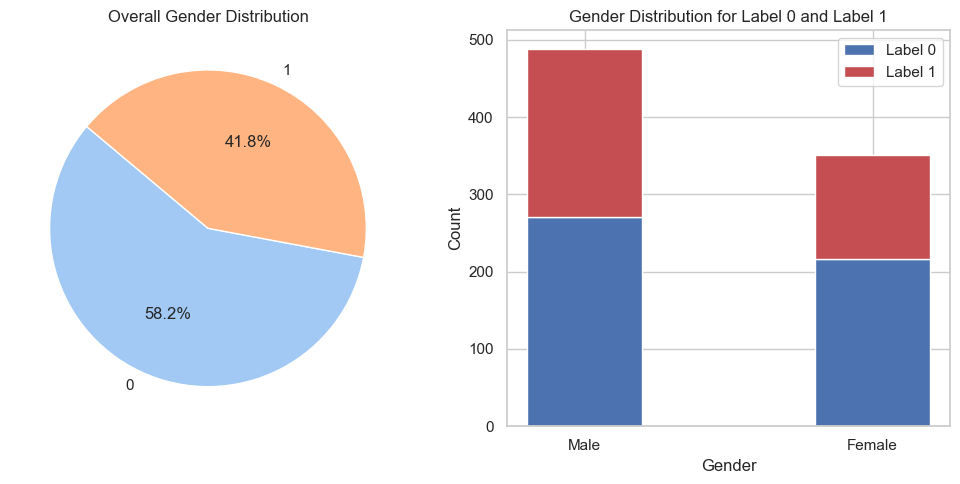

In [5]:
# 统计整体 gender 列的数量
gender_counts_total = df['Gender'].value_counts()

# 创建整体 gender 分布饼图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(gender_counts_total, labels=gender_counts_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Gender Distribution')

# 根据 label 分别统计男女数量
label0_gender_counts = df[df['label'] == 0]['Gender'].value_counts()
label1_gender_counts = df[df['label'] == 1]['Gender'].value_counts()

# 创建分别 label 为 0 和 1 时男女分布条形图
plt.subplot(1, 2, 2)
x = ['Male', 'Female']
plt.bar(x, label0_gender_counts, color='b', width=0.4, label='Label 0')
plt.bar(x, label1_gender_counts, color='r', width=0.4, label='Label 1', bottom=label0_gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution for Label 0 and Label 1')
plt.legend()

plt.tight_layout()
plt.show()


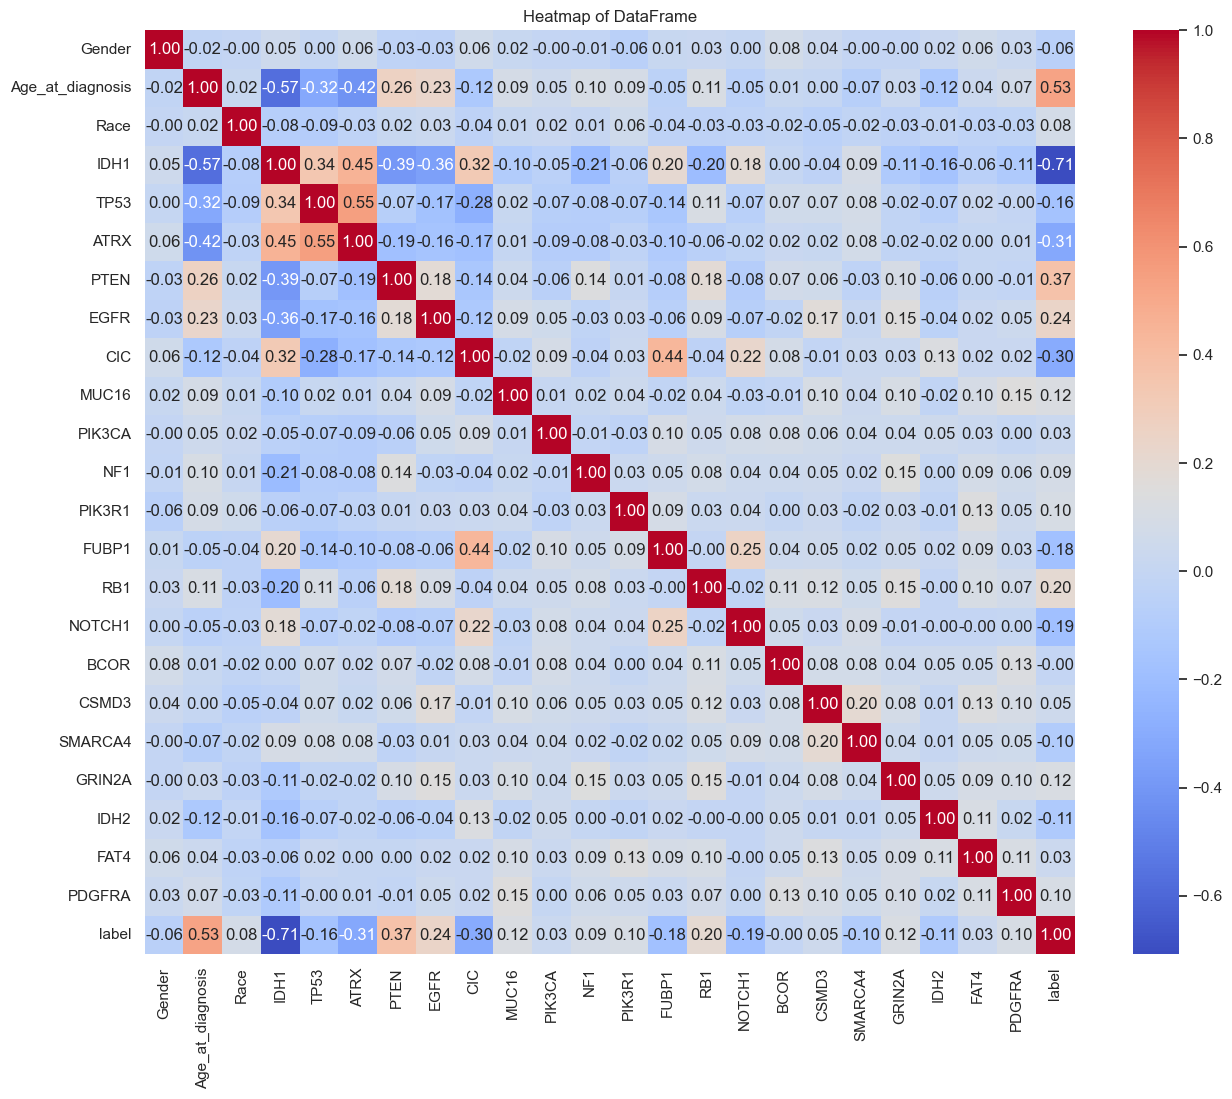

In [6]:
# 导入 seaborn 库
import seaborn as sns

# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of DataFrame')
plt.show()


In [42]:
df

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,label
0,0,51.30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.72,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.17,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,31.51,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,77.89,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
835,0,85.18,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
836,1,77.49,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
837,0,63.33,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [41]:
from scipy.stats import pearsonr

# 初始化存储p值的列表
p_values = []

# 循环遍历数据集的每一列（除了最后一列）
for column in df.columns[:-1]:
    # 计算Pearson相关系数和p值
    correlation, p_value = pearsonr(df[column], df[df.columns[-1]])
    # 添加p值到列表中
    p_values.append(p_value)

# 输出各列与最后一列的p值
for i, column in enumerate(df.columns[:-1]):
    print(f"P-value between '{column}' and the last column: {p_values[i]}")


P-value between 'Gender' and the last column: 0.08223576433477481
P-value between 'Age_at_diagnosis' and the last column: 9.887743458662563e-62
P-value between 'Race' and the last column: 0.02034460056007067
P-value between 'IDH1' and the last column: 1.1913032182545193e-128
P-value between 'TP53' and the last column: 2.4736301214487714e-06
P-value between 'ATRX' and the last column: 9.830793622803712e-21
P-value between 'PTEN' and the last column: 3.5644002987089547e-28
P-value between 'EGFR' and the last column: 1.3337797758887982e-12
P-value between 'CIC' and the last column: 2.4822296070603804e-19
P-value between 'MUC16' and the last column: 0.0005261122387338804
P-value between 'PIK3CA' and the last column: 0.4030549492111732
P-value between 'NF1' and the last column: 0.010658381893593616
P-value between 'PIK3R1' and the last column: 0.0031538053949824083
P-value between 'FUBP1' and the last column: 1.3111351049892256e-07
P-value between 'RB1' and the last column: 1.20086375800750

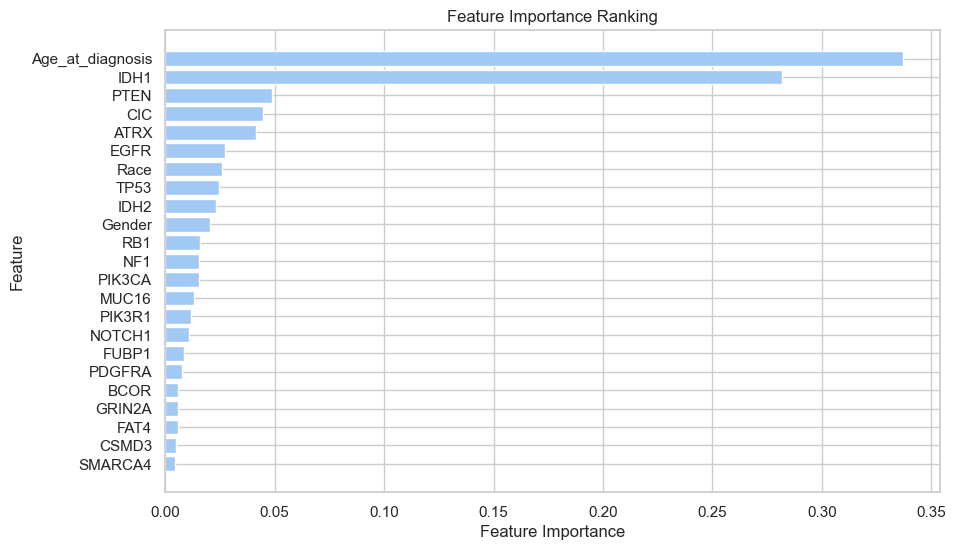

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 创建随机森林分类器
rf_classifier = RandomForestClassifier()

# 提取特征和标签
X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]   # 标签

# 拟合模型
rf_classifier.fit(X, y)

# 获取特征重要性
feature_importances = rf_classifier.feature_importances_

# 将特征重要性与特征名对应起来
feature_names = df.columns[:-1]  # 不包括最后一列标签
feature_importance_dict = dict(zip(feature_names, feature_importances))

# 对特征重要性排序
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 可视化特征重要性排序
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), [val[1] for val in sorted_feature_importances], align='center')
plt.yticks(range(len(sorted_feature_importances)), [val[0] for val in sorted_feature_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()  # 反转 y 轴顺序，使得特征重要性高的在上面
plt.show()


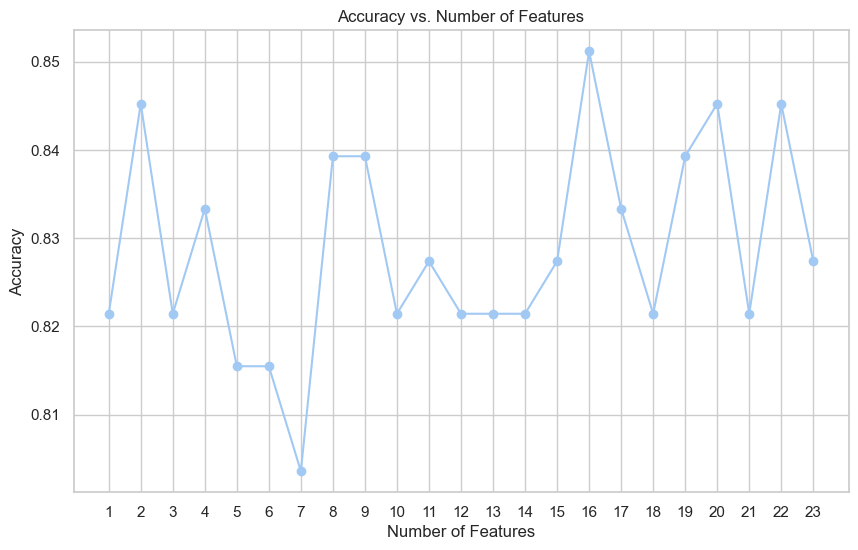

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np

# 初始化准确率列表
accuracies = []

# 按照排序依次添加特征
for feature, _ in sorted_feature_importances:
    # 选取当前特征和之前已选的特征
    selected_features = [feature for feature, _ in sorted_feature_importances if feature <= feature]

    # 仅使用选取的特征
    X_selected = X[selected_features]

    # 拆分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # 创建并训练随机森林模型
    rf_classifier.fit(X_train, y_train)

    # 计算模型准确率
    accuracy = rf_classifier.score(X_test, y_test)

    # 添加准确率到列表中
    accuracies.append(accuracy)

# 可视化准确率变化过程
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.xticks(np.arange(1, len(accuracies) + 1))
plt.grid(True)
plt.show()


In [26]:
# 选取排名前16的特征列
top_16_features = [feature for feature, _ in sorted_feature_importances[:16]]

# 添加标签列
top_16_features.append(df.columns[-1])

# 从原始DataFrame中提取这些列
df1 = df[top_16_features].copy()

df1

,Age_at_diagnosis,IDH1,PTEN,CIC,ATRX,EGFR,Race,TP53,IDH2,Gender,RB1,NF1,PIK3CA,MUC16,PIK3R1,NOTCH1,label
0,51.30,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,38.72,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35.17,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,32.78,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
4,31.51,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,77.89,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
835,85.18,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
836,77.49,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
837,63.33,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1


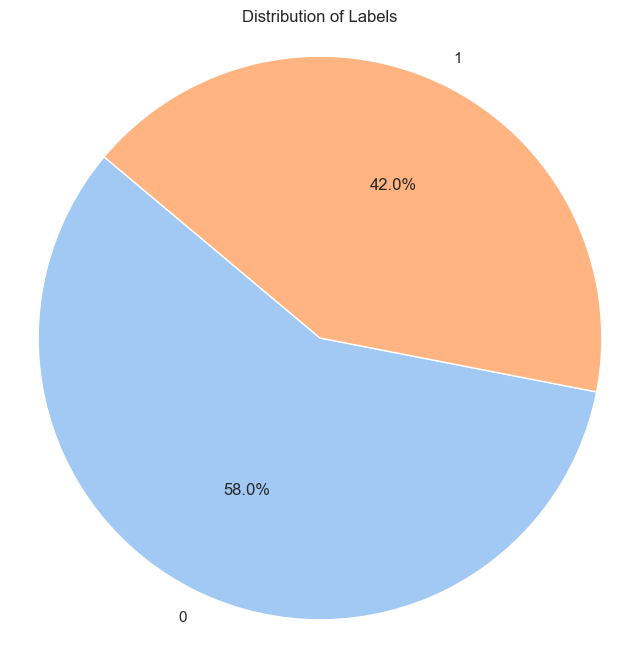

In [27]:
import matplotlib.pyplot as plt

# 统计不同类别的样本数量
label_counts = df1['label'].value_counts()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # 使饼图长宽相等
plt.show()


In [28]:
from imblearn.over_sampling import SMOTE

# 初始化SMOTE对象
smote = SMOTE(random_state=42)

# 提取特征列和标签列
X = df1.drop(columns=['label'])
y = df1['label']

# 使用SMOTE进行过采样
X_resampled, y_resampled = smote.fit_resample(X, y)

# 创建新的DataFrame
df2 = pd.DataFrame(X_resampled, columns=X.columns)
df2['label'] = y_resampled

# 显示新的DataFrame
df2

,Age_at_diagnosis,IDH1,PTEN,CIC,ATRX,EGFR,Race,TP53,IDH2,Gender,RB1,NF1,PIK3CA,MUC16,PIK3R1,NOTCH1,label
0,51.300000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,38.720000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35.170000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,32.780000,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
4,31.510000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,52.383592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
970,59.594996,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
971,48.628894,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
972,81.935242,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8615384615384616
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        98
           1       0.82      0.92      0.87        97

    accuracy                           0.86       195
   macro avg       0.87      0.86      0.86       195
weighted avg       0.87      0.86      0.86       195

AUC: 0.8944876919840101


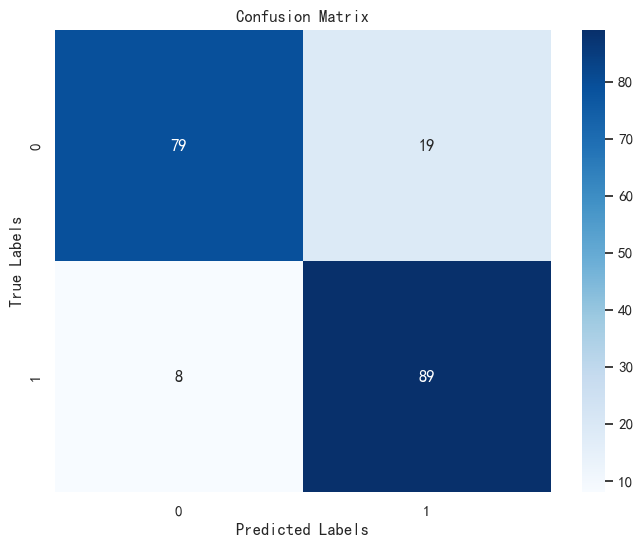

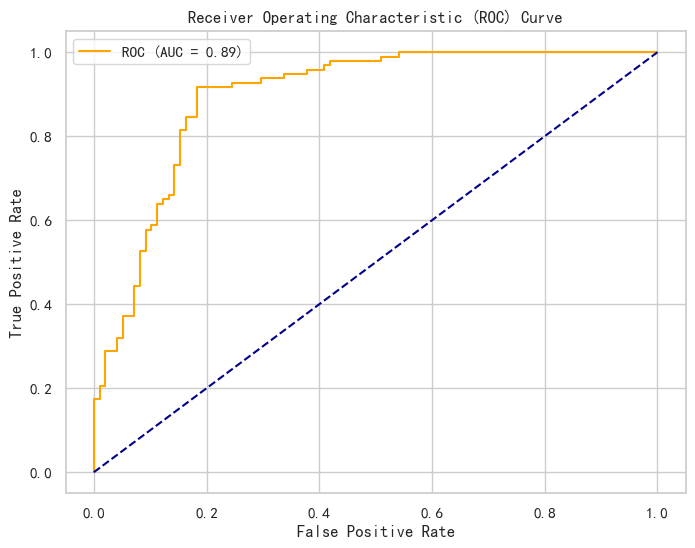

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 初始化多层感知器分类器
clf = MLPClassifier(random_state=42)

# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


使用了`sklearn`库中的`MLPClassifier`来初始化一个多层感知器分类器。`MLPClassifier`是`sklearn.neural_network`模块中的一个类，用于实现一个多层感知器神经网络，该网络可以用于分类任务。以下是`MLPClassifier`的一些默认参数和它们的含义：

1. `hidden_layer_sizes`: 一个整数或一个整数列表，指定一个或多个隐藏层中的神经元数量。默认情况下，这个参数是`(100,)`，意味着有一个隐藏层，其中包含100个神经元。

2. `activation`: 激活函数，用于隐藏层和输出层。默认情况下，这个参数是`'relu'`，表示使用修正线性单元（Rectified Linear Unit）作为激活函数。

3. `solver`: 用于训练神经网络的优化算法。默认情况下，这个参数是`'adam'`，表示使用Adam优化算法。

4. `alpha`: 正则化强度L2，用于权重。默认情况下，这个参数是`0.0001`。

5. `batch_size`: 每次梯度更新时的样本数。默认情况下，这个参数是`'auto'`，意味着使用整个训练数据集进行每次更新（即批量大小为训练集的大小）。

6. `learning_rate`: 学习率。默认情况下，这个参数是`'constant'`，表示学习率在训练过程中保持不变。

7. `max_iter`: 最大迭代次数。默认情况下，这个参数是`200`。

8. `random_state`: 控制随机数生成器的种子。默认情况下，这个参数是`None`，意味着每次运行的结果可能不同。

9. `tol`: 停止训练的容忍度。默认情况下，这个参数是`0.0001`。

10. `verbose`: 用于控制训练过程中的输出信息。默认情况下，这个参数是`False`，表示不输出任何训练信息。

11. `warm_start`: 当设置为`True`时，重用之前层的权重，而不是从头开始训练。默认情况下，这个参数是`False`。

12. `momentum`: 用于加速梯度下降的动量。默认情况下，这个参数是`0.9`。

13. `n_iter_no_change`: 连续多少次迭代没有改善时，训练才会停止。默认情况下，这个参数是`10`。

14. `early_stopping`: 当设置为`True`时，如果验证分数在一定数量的迭代中没有改善，则提前停止训练。默认情况下，这个参数是`False`。

在您的代码中，您已经明确设置了`random_state=42`，这是为了确保结果的可重复性。其他参数则使用了它们的默认值。在实际应用中，根据具体问题的不同，您可能需要调整这些参数以获得最佳的模型性能。

Accuracy: 0.7230769230769231
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        98
           1       0.70      0.76      0.73        97

    accuracy                           0.72       195
   macro avg       0.72      0.72      0.72       195
weighted avg       0.72      0.72      0.72       195

AUC: 0.7768777614138439


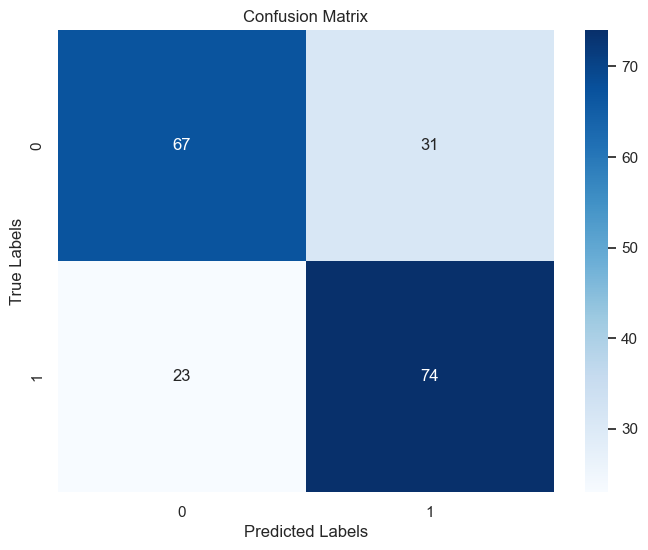

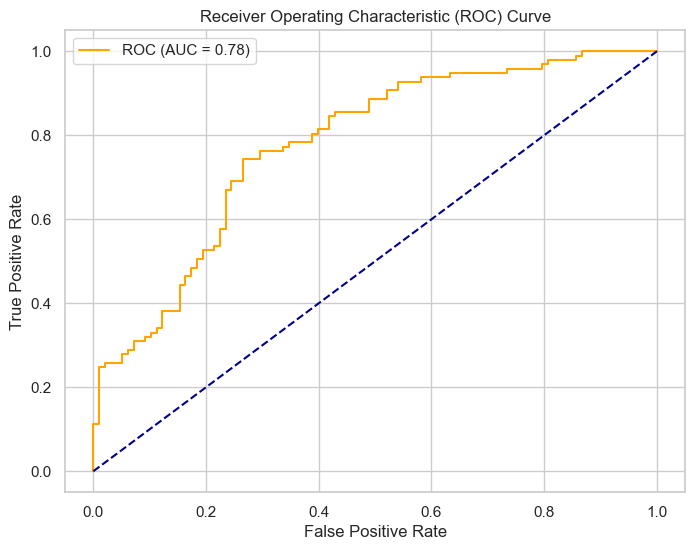

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 初始化支持向量机分类器
clf = SVC(probability=True, random_state=42)

# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


使用了sklearn库中的SVC来初始化一个支持向量机（SVM）分类器。SVC是sklearn.svm模块中的一个类，用于实现支持向量机，该算法可以用于分类和回归任务。以下是SVC的一些默认参数和它们的含义：

C: 正则化参数，控制错误分类的惩罚程度。默认情况下，这个参数是1.0。

kernel: 用于分类的核函数类型。默认情况下，这个参数是'rbf'，表示使用径向基函数（Radial Basis Function）作为核函数。

degree: 多项式核函数的度数。默认情况下，这个参数是3。

gamma: 核函数的参数，定义单个训练样本的影响范围，'scale'表示1 / (n_features * X.var())，'auto'表示1 / n_features。默认情况下，这个参数是'scale'。

coef0: 多项式核函数的独立项。默认情况下，这个参数是0.0。

probability: 启用概率估计，当设置为True时，SVC会使用额外的训练时间来计算每个类的概率估计。默认情况下，这个参数是False。

shrinking: 是否启用缩减。默认情况下，这个参数是True，表示在训练时进行缩减，这可以提高模型的训练效率。

tol: 停止训练的容忍度。默认情况下，这个参数是0.001。

cache_size: 用于训练的内存大小（以字节为单位）。默认情况下，这个参数是20000。

class_weight: 指定权重给每个类别，可以是字典、列表或'balanced'。默认情况下，这个参数是None。

verbose: 控制训练过程中的输出信息。默认情况下，这个参数是False。

max_iter: 最大迭代次数。默认情况下，这个参数是-1，表示使用默认的最大迭代次数。

在您的代码中，您设置了probability=True，这是为了计算每个样本的预测概率，从而能够计算ROC曲线和AUC值。random_state=42是为了确保结果的可重复性。

Accuracy: 0.7743589743589744
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        98
           1       0.78      0.76      0.77        97

    accuracy                           0.77       195
   macro avg       0.77      0.77      0.77       195
weighted avg       0.77      0.77      0.77       195

AUC: 0.7743004418262149


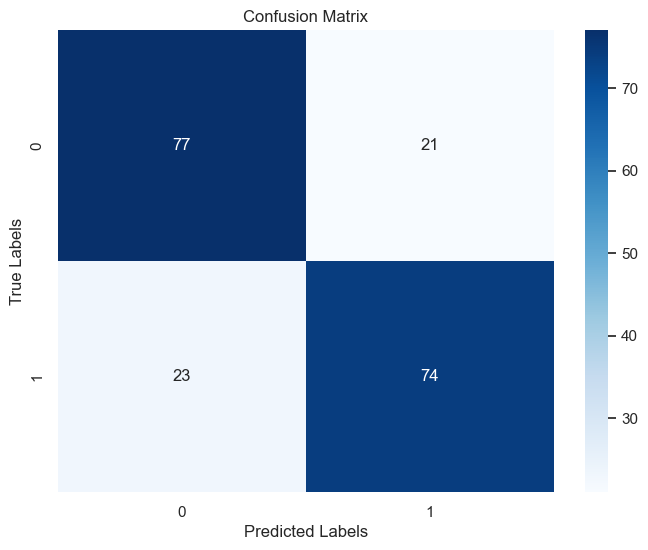

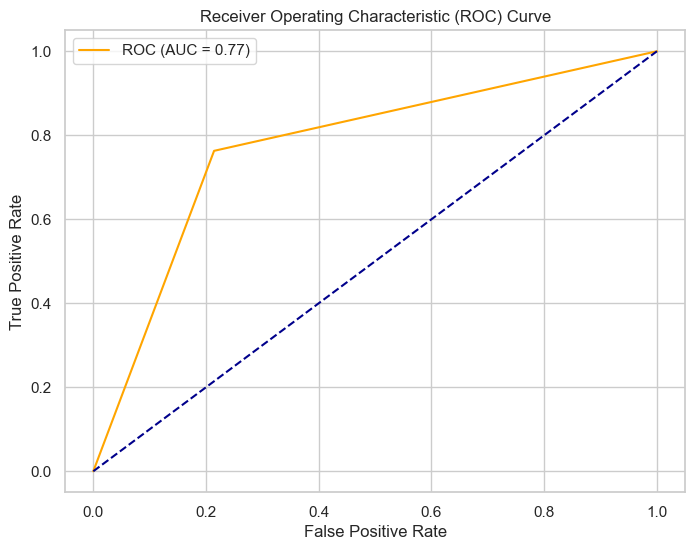

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 初始化决策树分类器
clf = DecisionTreeClassifier(random_state=42)

# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


使用了sklearn库中的DecisionTreeClassifier来初始化一个决策树分类器。DecisionTreeClassifier是sklearn.tree模块中的一个类，用于实现决策树算法，该算法可以用于分类任务。以下是DecisionTreeClassifier的一些默认参数和它们的含义：

criterion: 用于衡量分裂质量的函数。默认情况下，这个参数是'gini'，表示使用基尼不纯度（Gini impurity）作为分裂质量的衡量标准。

splitter: 用于在节点分裂时选择分裂的策略。默认情况下，这个参数是'best'，表示选择最佳分裂。

max_depth: 树的最大深度。默认情况下，这个参数是None，意味着树会生长到所有叶子都是纯净的，即没有进一步的分裂。

min_samples_split: 分裂内部节点所需的最小样本数。默认情况下，这个参数是2。

min_samples_leaf: 叶节点中的最小样本数。默认情况下，这个参数是1。

min_weight_fraction_leaf: 叶节点中的最小权重分数。默认情况下，这个参数是0.0。

max_features: 寻找最佳分裂时考虑的特征数量。默认情况下，这个参数是None，意味着使用所有特征。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

max_leaf_nodes: 最大叶节点数。默认情况下，这个参数是None，意味着没有限制。

min_impurity_decrease: 如果节点分裂导致不纯度的减少大于或等于这个值，则节点将会分裂。默认情况下，这个参数是0.0。

Accuracy: 0.8307692307692308
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        98
           1       0.81      0.87      0.84        97

    accuracy                           0.83       195
   macro avg       0.83      0.83      0.83       195
weighted avg       0.83      0.83      0.83       195

AUC: 0.8940143067536293


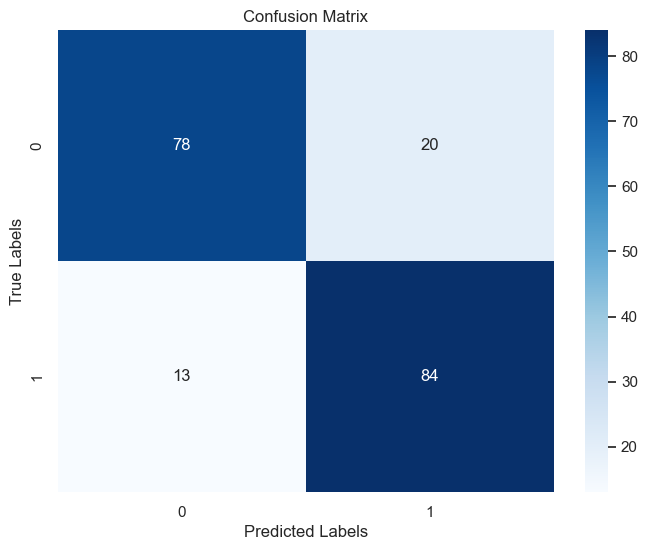

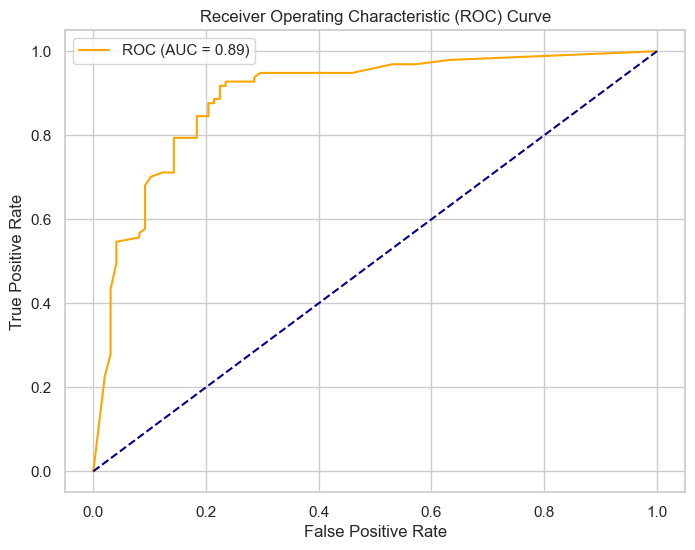

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 初始化随机森林分类器
clf = RandomForestClassifier(random_state=42)

# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

使用了sklearn库中的RandomForestClassifier来初始化一个随机森林分类器。RandomForestClassifier是sklearn.ensemble模块中的一个类，用于实现随机森林算法，该算法是一种集成学习方法，通过构建多个决策树并将它们的预测结果进行组合来提高分类性能。以下是RandomForestClassifier的一些默认参数和它们的含义：

n_estimators: 森林中树木的数量。默认情况下，这个参数是100。

criterion: 衡量分裂质量的函数。默认情况下，这个参数是'gini'，表示使用基尼不纯度作为衡量标准。

max_depth: 树的最大深度。默认情况下，这个参数是None，意味着树会生长到所有叶子都是纯净的。

min_samples_split: 分裂内部节点所需的最小样本数。默认情况下，这个参数是2。

min_samples_leaf: 叶节点中的最小样本数。默认情况下，这个参数是1。

min_weight_fraction_leaf: 叶节点中的最小权重分数。默认情况下，这个参数是0.0。

max_features: 寻找最佳分裂时考虑的特征数量。默认情况下，这个参数是'auto'，意味着对于分类问题，考虑所有特征；对于回归问题，考虑sqrt(n_features)。

max_leaf_nodes: 最大叶节点数。默认情况下，这个参数是None，意味着没有限制。

min_impurity_decrease: 如果节点分裂导致不纯度的减少大于或等于这个值，则节点将会分裂。默认情况下，这个参数是0.0。

bootstrap: 是否在构建树时使用bootstrap样本。默认情况下，这个参数是True，意味着会使用bootstrap方法。

oob_score: 是否使用袋外样本来估计R^2分数。默认情况下，这个参数是False。

n_jobs: 并行运行的作业数。默认情况下，这个参数是-1，意味着使用所有可用的CPU核心。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

verbose: 控制训练过程中的输出信息。默认情况下，这个参数是0，意味着不输出训练信息。

warm_start: 当设置为True时，重用之前层的权重，而不是从头开始训练。默认情况下，这个参数是False。

ccp_alpha: 用于最小化成本复杂性剪枝的复杂性参数。默认情况下，这个参数是0.0。

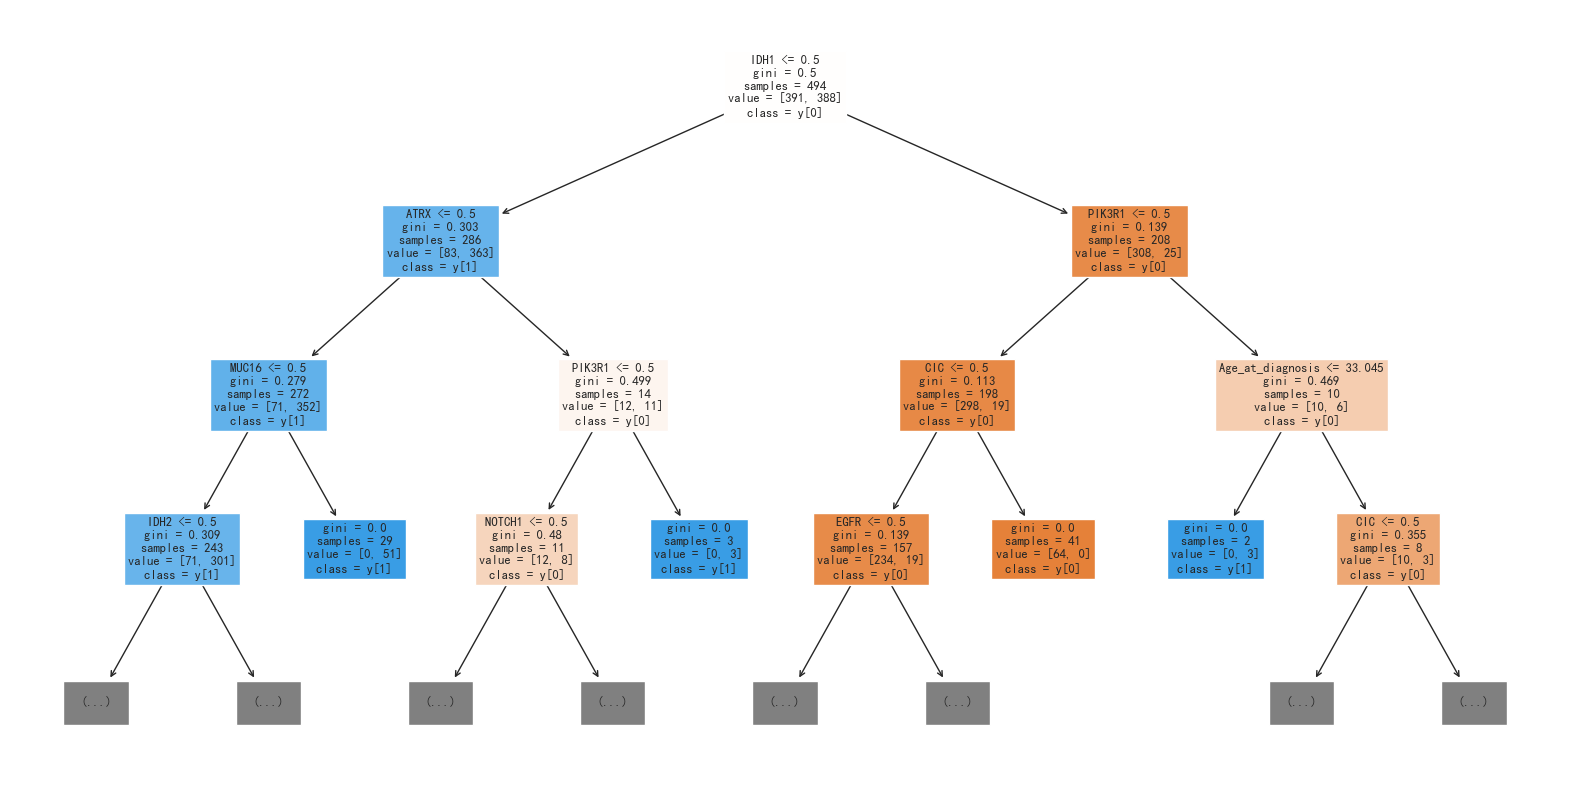

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 初始化随机森林分类器
clf = RandomForestClassifier(random_state=42)

# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 获取第一棵树
first_tree = clf.estimators_[0]

# 绘制部分树
plt.figure(figsize=(20, 10))
plot_tree(first_tree, max_depth=3, filled=True, feature_names=X.columns, class_names=True)
plt.show()

Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        98
           1       0.81      0.84      0.82        97

    accuracy                           0.82       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.82      0.82      0.82       195

AUC: 0.888701872501578


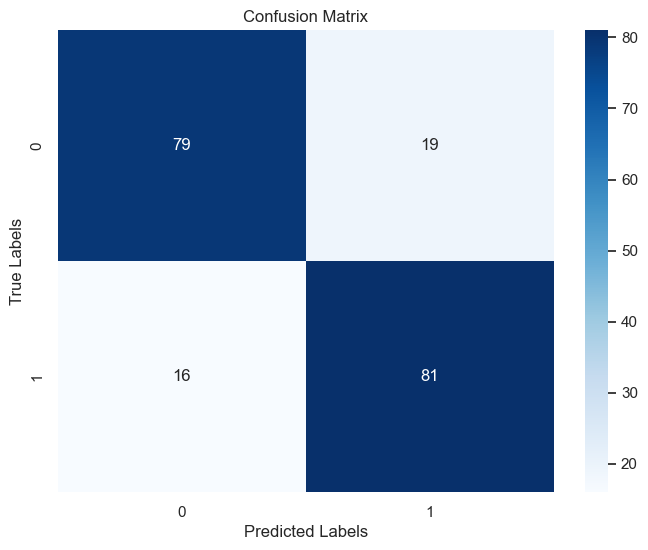

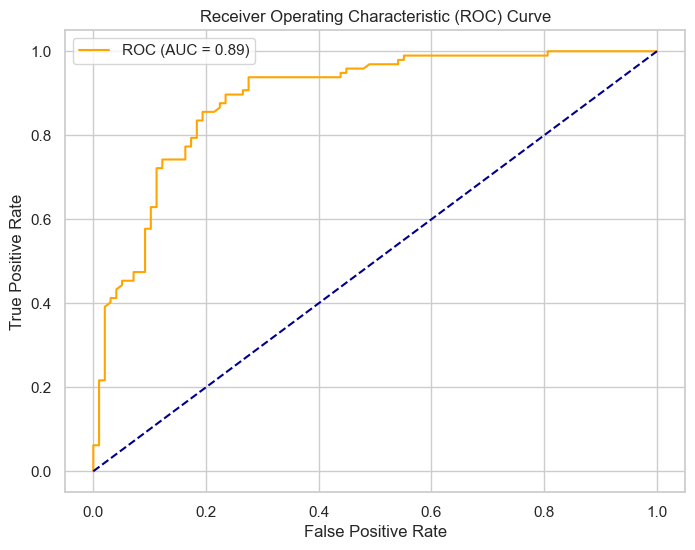

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 初始化XGBoost分类器
clf = xgb.XGBClassifier(random_state=42)

# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

使用了xgboost库中的XGBClassifier来初始化一个XGBoost分类器。XGBoost是一种高效的梯度提升框架，它使用了梯度提升算法来构建决策树，并通过集成多个决策树来提高模型的预测性能。以下是XGBClassifier的一些默认参数和它们的含义：

booster: 指定XGBoost的模型类型，可以是'gbtree'（默认）或'gblinear'或'dart'。'gbtree'表示使用基于树的模型，'dart'表示使用与Dropout机制结合的模型。

use_label_encoder: 是否使用标签编码器。默认情况下，这个参数是False。

eval_metric: 评估模型性能的指标。默认情况下，这个参数是'mlogloss'，表示使用对数损失（log loss）作为评估指标。

objective: 学习任务和相应的学习目标。默认情况下，这个参数是'binary:logistic'，表示对于二分类问题使用逻辑回归损失函数。

n_estimators: 迭代次数，即构建的树的数量。默认情况下，这个参数是100。

learning_rate: 学习率，控制每次迭代更新的幅度。默认情况下，这个参数是0.3。

max_depth: 树的最大深度。默认情况下，这个参数是6。

min_child_weight: 决定最小叶子节点样本权重和。默认情况下，这个参数是0。

gamma: 节点分裂所需的最小损失函数下降值。默认情况下，这个参数是0。

subsample: 训练模型时随机选择的样本比例。默认情况下，这个参数是1，表示使用全部数据。

colsample_bytree: 构建树时的列采样比例。默认情况下，这个参数是1，表示使用全部特征。

colsample_bylevel: 在树的每一层进行的列采样比例。默认情况下，这个参数是1。

colsample_bynode: 在树的节点分裂过程中的列采样比例。默认情况下，这个参数是1。

lambda: L2 正则化项的权重，增加这个值会使模型更保守。默认情况下，这个参数是1.0。

alpha: L1 正则化项的权重，增加这个值也会使模型更保守。默认情况下，这个参数是0。

scale_pos_weight: 正权重与负权重的比例，用于处理不平衡数据集。默认情况下，这个参数是1。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        98
           1       0.80      0.85      0.82        97

    accuracy                           0.82       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.82      0.82      0.82       195

AUC: 0.8820218809173153


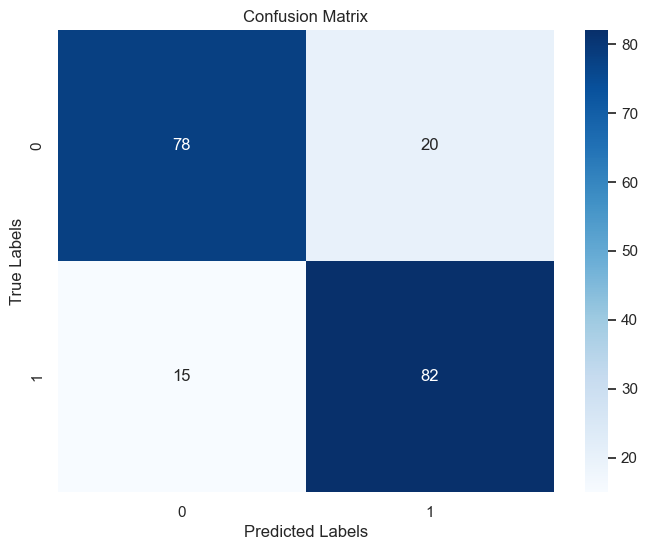

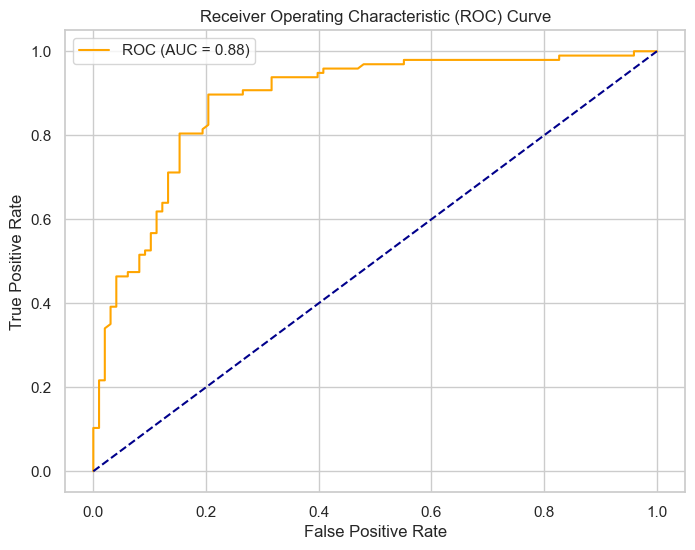

In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 初始化LightGBM分类器
clf = lgb.LGBMClassifier(random_state=42)

# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

使用了lightgbm库中的LGBMClassifier来初始化一个LightGBM分类器。LightGBM是一种基于梯度提升框架的高效的机器学习算法，它使用了基于树的模型来提高预测性能。以下是LGBMClassifier的一些默认参数和它们的含义：

boosting_type: 指定Boosting类型。默认情况下，这个参数是'gbdt'，表示使用梯度提升决策树（Gradient Boosting Decision Tree）。

objective: 指定学习任务和目标函数。默认情况下，这个参数是'binary'，表示用于二分类问题的逻辑回归目标函数。

metric: 评估模型性能的指标。默认情况下，这个参数是'binary_logloss'，表示使用二分类对数损失。

num_leaves: 树中最大的叶子节点数。默认情况下，这个参数是31。

max_depth: 树的最大深度。默认情况下，这个参数是-1，表示不限制树的深度。

learning_rate: 学习率，控制每次迭代更新的幅度。默认情况下，这个参数是0.1。

n_estimators: 迭代次数，即构建的树的数量。默认情况下，这个参数是100。

subsample: 训练模型时随机选择的样本比例。默认情况下，这个参数是1，表示使用全部数据。

subsample_freq: 进行子采样的频率。默认情况下，这个参数是0，表示构建每棵树时都会进行子采样。

colsample_bytree: 构建树时的列采样比例。默认情况下，这个参数是1，表示使用全部特征。

min_child_samples: 分裂节点所需的最小数据量。默认情况下，这个参数是20。

min_child_weight: 分裂节点所需的最小权重和。默认情况下，这个参数是0.001。

max_delta_step: 每棵树的最大delta步长，用于防止过拟合。默认情况下，这个参数是0，表示不限制步长。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


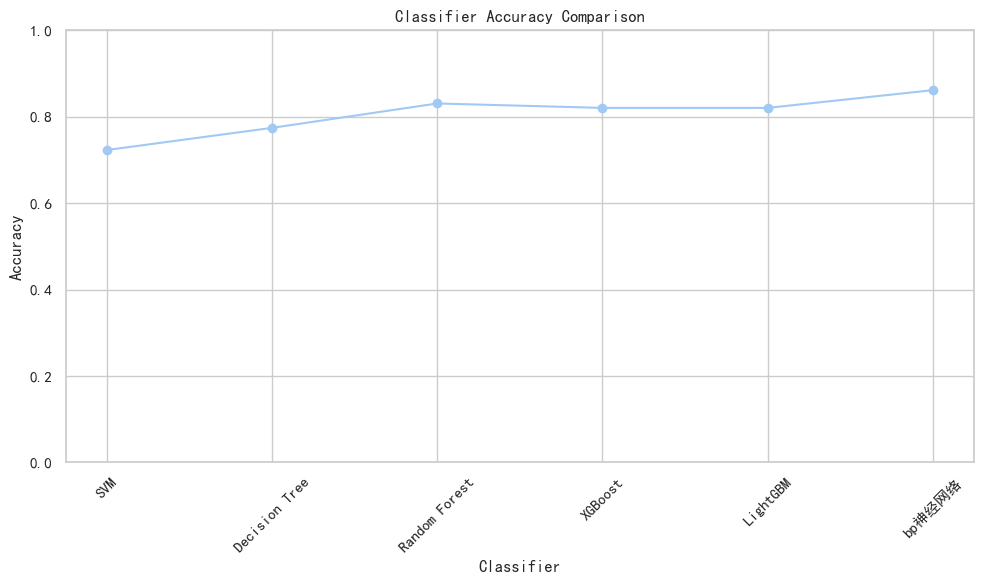

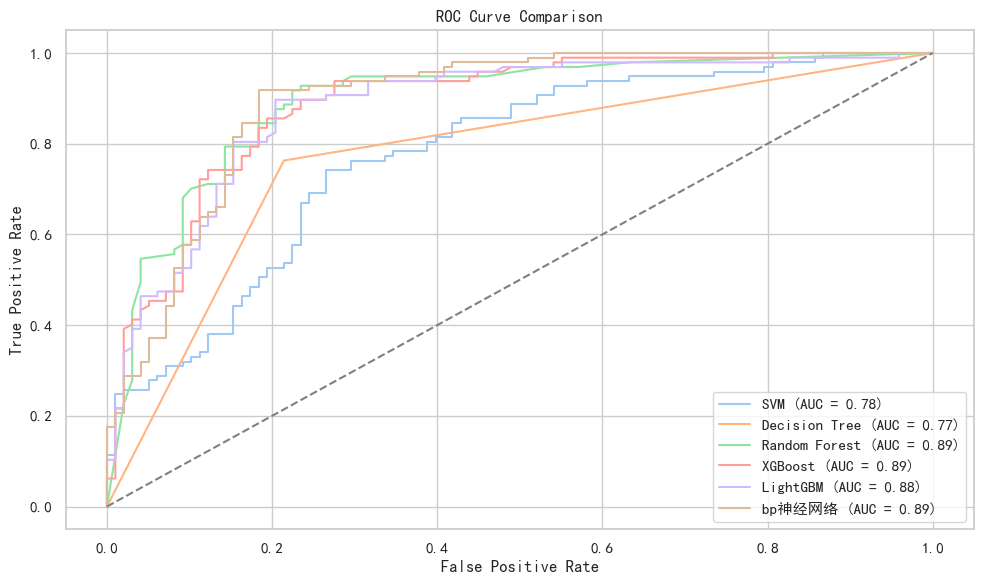

In [35]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 初始化各个分类器
svm_clf = SVC(probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
lgbm_clf = LGBMClassifier(random_state=42)
clf = MLPClassifier(random_state=42)
# 训练并计算准确率
classifiers = [svm_clf, dt_clf, rf_clf, xgb_clf, lgbm_clf,clf]
classifier_names = ['SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM','bp神经网络']
accuracies = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 绘制准确率对比图
plt.figure(figsize=(10, 6))
plt.plot(classifier_names, accuracies, marker='o')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 计算并绘制ROC曲线
plt.figure(figsize=(10, 6))
for clf, name in zip(classifiers, classifier_names):
    y_scores = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Voting Classifier Accuracy: 0.8717948717948718
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       105
           1       0.85      0.88      0.86        90

    accuracy                           0.87       195
   macro avg       0.87      0.87      0.87       195
weighted avg       0.87      0.87      0.87       195

Voting Classifier AUC: 0.9234920634920636


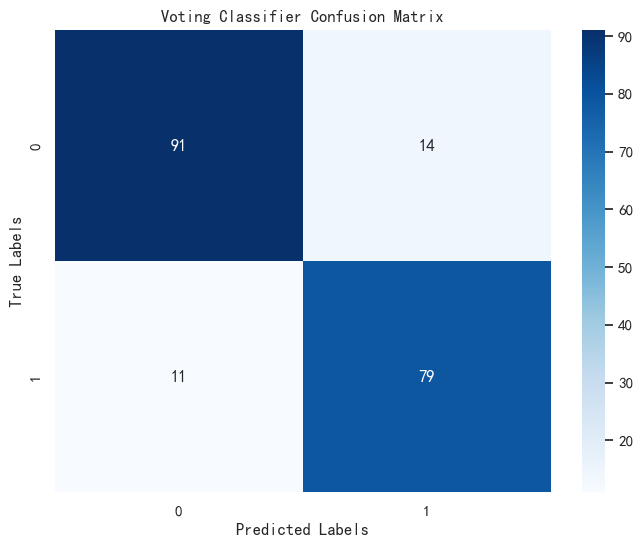

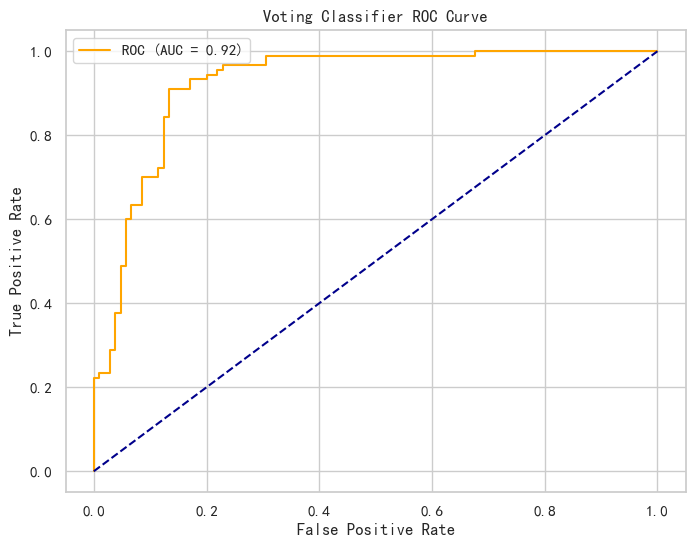

In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# 准备特征和标签
X = df2.drop(columns=['label'])
y = df2['label']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 初始化各个基分类器
bp_clf = MLPClassifier(random_state=20)
xgb_clf = XGBClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# 初始化软投票分类器
voting_clf = VotingClassifier(
    estimators=[('bp', bp_clf), ('xgb', xgb_clf), ('rf', rf_clf)],
    voting='soft' # 使用软投票策略
)

# 训练软投票模型
voting_clf.fit(X_train, y_train)

# 预测
y_pred_voting = voting_clf.predict(X_test)

# 计算准确率
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

# 输出综合报告
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)

# 计算AUC值
roc_auc_voting = auc(fpr_voting, tpr_voting)
print("Voting Classifier AUC:", roc_auc_voting)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt='d', cmap='Blues')
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='orange', label='ROC (AUC = %0.2f)' % roc_auc_voting)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Classifier ROC Curve')
plt.legend()
plt.show()

使用了VotingClassifier来构建一个集成学习模型。VotingClassifier是sklearn库中的一个类，它通过结合多个基分类器的预测结果来提高模型的准确性和鲁棒性。集成学习是一种强大的机器学习技术，特别是当单个模型的性能不足以满足需求时，集成学习可以通过组合多个模型来提升整体性能。

在这个例子中，VotingClassifier结合了三种不同的基分类器：

MLPClassifier：多层感知器分类器，它是一个基于神经网络的模型，可以捕捉数据中的非线性关系。

XGBClassifier：XGBoost分类器，它是一种基于梯度提升决策树的高效机器学习算法，特别适合处理大规模数据集和复杂的特征关系。

RandomForestClassifier：随机森林分类器，它是一个基于决策树的集成方法，通过构建多个决策树并对它们的预测结果进行平均或多数投票来提高模型性能。

VotingClassifier的参数voting='soft'指定了软投票策略，这意味着在进行最终预测时，每个基分类器的预测概率将被考虑在内，而不是简单地进行多数投票。软投票通常用于分类任务，特别是当基分类器的预测概率可以提供更多信息时。